# Visualization of sales forecasts

In this notebook we bring together the true sales values from 09-2019 to 08-2021 and the sales forecasts from all the models we fit, i.e.,
* the forecasts from static forecasting `static_baseline.ipynb`,
* the forecasts from historical average forecasting `historical_average_baseline.ipynb`,
* the forecasts from vector autoregression `vector_autoregression_baseline.ipynb`,
* the forecasts from the GTS model `gts_model.ipynb`.

Then we plot the original sales values and the various forecasts for each of the 57 regions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf')

## Define helper function

In [2]:
def plot_sales(data: pd.core.frame.DataFrame, regions_to_plot: list, y_height: int, ymin: int, ymax: int, savefig: bool, filename: str):
    """
    Plot the variable sales for different regions.
    :data: data frame containing the original sales and the sales forecasts
    :regions_to_plot: list containing the regions to create plots for 
    :y_height: integer indicating the y-value of the train, val, test labels
    :ymin: integer indicating the lowest y-value of the dashed grey lines
    :ymax: integer indicating the highest y-value of the dashed grey lines
    :savefig: boolean indicating whether the plots are to be saved
    :filename: string indicating the name under which the plots are to be saved
    """
    regions_to_plot = regions_to_plot
    data_plot = data.loc[data['region'].isin(regions_to_plot)].reset_index(drop = True)

    fig = sns.relplot(x = 'time', y = 'sales', data = data_plot, col_wrap = 2,
                     col = 'region', hue = 'type', kind = 'line', marker = 'o') 

    # Change x and y labels and rotate labels
    axes = fig.axes.flatten()
    for ax in axes:
        ax.tick_params(labelleft = True)
        ax.tick_params(labelbottom = True)
        plt.setp(ax.get_xticklabels(), visible = True, rotation = 45, horizontalalignment = 'right', fontsize = 10)
        ax.text(6, y_height, "train", horizontalalignment='left', size='medium', color='black', weight='semibold')
        ax.text(15.5, y_height, "val", horizontalalignment='left', size='medium', color='black', weight='semibold')
        ax.text(20, y_height, "test", horizontalalignment='left', size='medium', color='black', weight='semibold')
    
    # Make tick labels appear every month
    new_ticks = [i.get_text() for i in ax.get_xticklabels()]
    plt.xticks(range(0, len(new_ticks), 1), new_ticks[::1])
    
    fig._legend.set_bbox_to_anchor((1.2,0.5)) 
    
    for ax in fig.axes.ravel():
        ax.plot((14.5, 14.5), (ymin, ymax), ls='--', color='0.7')
        ax.plot((17.5, 17.5), (ymin, ymax), ls='--', color='0.7')
        
    handles, labels = fig.axes[0].get_legend_handles_labels()
    fig._legend.remove()
    fig.fig.legend(handles, labels, ncol=5, loc='upper center', 
                bbox_to_anchor=(0.5, -0.02), frameon=True, title = 'sales type', edgecolor='black')
        
    plt.tight_layout()
    
    if savefig:
        plt.savefig(f"./plots/{filename}.svg", bbox_inches='tight')

## Load true sales and sales forecasts

We now read in the original sales values and the various sales forecasts.

In [3]:
route0 = "./forecasts"

In [4]:
original_sales = pd.read_pickle(f"{route0}/original_sales.pkl") 
y_predict_val_st = pd.read_pickle(f"{route0}/y_predict_val_st.pkl") 
y_predict_test_st = pd.read_pickle(f"{route0}/y_predict_test_st.pkl") 
y_predict_val_ha = pd.read_pickle(f"{route0}/y_predict_val_ha.pkl") 
y_predict_test_ha = pd.read_pickle(f"{route0}/y_predict_test_ha.pkl") 
y_predict_val_va = pd.read_pickle(f"{route0}/y_predict_val_va.pkl") 
y_predict_test_va = pd.read_pickle(f"{route0}/y_predict_test_va.pkl") 
y_predict_val_gts = pd.read_pickle(f"{route0}/y_predict_val_gts.pkl") 
y_predict_test_gts = pd.read_pickle(f"{route0}/y_predict_test_gts.pkl") 

As a preparation for plotting the original sales values and the sales forecasts for each region, we concatenate them and combine them in a pandas dataframe.

In [5]:
plot_data = pd.concat([original_sales, y_predict_val_st, y_predict_test_st, y_predict_val_ha, y_predict_test_ha, y_predict_val_va, y_predict_test_va, y_predict_val_gts, y_predict_test_gts],ignore_index=True)
plot_data

territory,Blekinge,Blekinge ONCO,Dalarna,Dalarna ONCO,Gävleborg-Gävle,Gävleborg-Gävle ONCO,Halland-Halmstad,Halland-Halmstad ONCO,Halland-Varberg-Falkenberg,Jämtland,...,Västra Götaland-Skövde,Västra Götaland-SÄS ONCO,Västra Götaland-Uddevalla,Örebro-Örebro,Örebro-Örebro ONCO,Östergötland-Linköping,Östergötland-Linköping ONCO,Östergötland-Norrköping,time,type
0,61.000000,288.000000,30.000000,326.000000,10.000000,198.000000,30.000000,96.000000,30.000000,0.000000,...,20.000000,1319.000000,30.000000,91.000000,294.000000,0.000000,548.000000,0.000000,09-2019,original
1,122.000000,526.000000,51.000000,325.000000,0.000000,466.000000,51.000000,96.000000,30.000000,0.000000,...,122.000000,1137.000000,51.000000,30.000000,576.000000,0.000000,630.000000,0.000000,10-2019,original
2,30.000000,123.000000,51.000000,537.000000,30.000000,133.000000,51.000000,288.000000,30.000000,0.000000,...,51.000000,1452.000000,61.000000,152.000000,585.000000,0.000000,619.000000,0.000000,11-2019,original
3,122.000000,336.000000,51.000000,154.000000,30.000000,304.000000,20.000000,154.000000,30.000000,0.000000,...,61.000000,1352.000000,30.000000,152.000000,560.000000,0.000000,490.000000,0.000000,12-2019,original
4,103.000000,127.000000,42.000000,75.000000,101.000000,372.000000,106.000000,270.000000,52.000000,42.000000,...,109.000000,1315.000000,30.000000,135.000000,607.000000,30.000000,633.000000,0.000000,01-2020,original
5,108.000000,199.000000,0.000000,127.000000,87.000000,246.000000,64.000000,87.000000,21.000000,50.000000,...,50.000000,982.000000,21.000000,64.000000,335.000000,50.000000,358.000000,0.000000,02-2020,original
6,177.000000,352.000000,7.000000,258.000000,73.000000,340.000000,78.000000,232.000000,0.000000,78.000000,...,28.000000,1081.000000,85.000000,120.000000,990.000000,14.000000,503.000000,0.000000,03-2020,original
7,113.000000,143.000000,0.000000,55.000000,14.000000,549.000000,52.000000,270.000000,43.000000,71.000000,...,0.000000,1320.000000,64.000000,50.000000,419.000000,28.000000,653.000000,42.000000,04-2020,original
8,128.000000,108.000000,7.000000,52.000000,30.000000,593.000000,28.000000,157.000000,0.000000,21.000000,...,50.000000,1513.000000,43.000000,106.000000,294.000000,21.000000,465.000000,50.000000,05-2020,original
9,57.000000,260.000000,14.000000,127.000000,0.000000,956.000000,57.000000,288.000000,64.000000,64.000000,...,21.000000,1356.000000,64.000000,191.000000,532.000000,0.000000,380.000000,35.000000,06-2020,original


In order to be able to plot the original sales values and the sales forecasts for each region later with the function [`seaborn.relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html), we need a pandas dataframe with the four columns `type`, `time`, `region` and `sales`. Thus we have to reshape our pandas dataframe from wide to long format.  

In [6]:
plot_data = pd.melt(plot_data, id_vars = ['type', 'time'], var_name = 'region', value_name = 'sales', ignore_index = True)
plot_data

,type,time,region,sales
0,original,09-2019,Blekinge,61.000000
1,original,10-2019,Blekinge,122.000000
2,original,11-2019,Blekinge,30.000000
3,original,12-2019,Blekinge,122.000000
4,original,01-2020,Blekinge,103.000000
...,...,...,...,...
3415,gts,04-2021,Östergötland-Norrköping,41.887268
3416,gts,05-2021,Östergötland-Norrköping,45.261536
3417,gts,06-2021,Östergötland-Norrköping,41.251404
3418,gts,07-2021,Östergötland-Norrköping,44.735626


The plotting will be done in small parts. For example, the original sales values and sales forecasts are only plotted for 6 regions at a time, so that they can be better accommodated on the pages of the master's thesis.

To do this, we use the function `plot_sales()` that can create the plots for our desired number of regions.

In [7]:
bc_regions = ['Blekinge', 'Dalarna', 'Gävleborg-Gävle', 'Halland-Halmstad', 'Halland-Varberg-Falkenberg', 'Jämtland', 
              'Jönköping-Jönköping', 'Jönköping-Nässjö-Eksjö', 'Jönköping-Värnamo', 'Kalmar', 'Kronoberg-Ljungby', 
              'Kronoberg-Växjö', 'Norrbotten-Sunderbyn',  'Skåne-Helsingborg-Landskrona', 'Skåne-Kristianstad', 'Skåne-Lund', 
              'Stockholm', 'Stockholm-Gotland', 'Sörmland-Eskilstuna', 'Uppsala', 'Värmland-Karlstad', 
              'Västerbotten-Skellefteå', 'Västerbotten-Umeå', 'Västernorrland-Sundsvall', 'Västernorrland-Örnsköldsvik', 
              'Västmanland-Västerås', 'Västra Götaland-Alingsås', 'Västra Götaland-Borås', 'Västra Götaland-Göteborg', 
              'Västra Götaland-Lidköping', 'Västra Götaland-Skövde', 'Västra Götaland-Uddevalla', 'Örebro-Örebro', 
              'Östergötland-Linköping', 'Östergötland-Norrköping']

In [8]:
melanoma_regions = ['Blekinge ONCO', 'Dalarna ONCO', 'Gävleborg-Gävle ONCO', 'Halland-Halmstad ONCO', 'Jämtland ONCO', 
                    'Jönköping ONCO', 'Kalmar ONCO', 'Kronoberg-Växjö ONCO', 'Norrbotten-Sunderbyn ONCO', 'Skåne ONCO', 
                    'Stockholm ONCO', 'Stockholm-Gotland ONCO', 'Sörmland-Eskilstuna ONCO', 'Uppsala ONCO', 
                    'Värmland-Karlstad ONCO', 'Västerbotten-Umeå ONCO', 'Västernorrland-Sundsvall ONCO', 
                    'Västmanland-Västerås ONCO', 'Västra Götaland-Göteborg ONCO', 'Västra Götaland-SÄS ONCO', 
                    'Örebro-Örebro ONCO', 'Östergötland-Linköping ONCO'] 

## Plot forecasts

### BC regions

First, we create the plots for the breast cancer regions.

#### BC regions 1-6: Blekinge, Dalarna, Gävleborg-Gävle, Halland-Halmstad, Halland-Varberg-Falkenberg, Jämtland

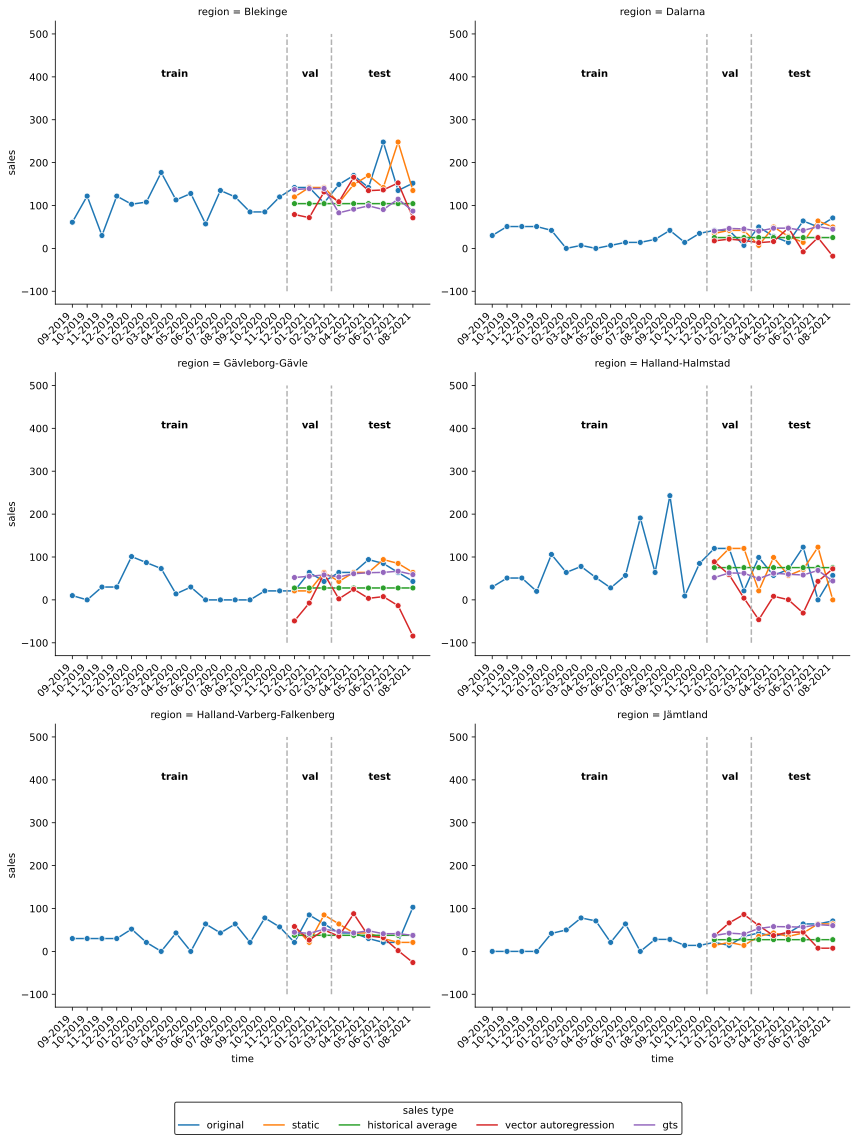

In [10]:
plot_sales(plot_data, regions_to_plot = bc_regions[0:6], y_height = 400, ymin = -100, ymax = 500, savefig = True, 
           filename = 'bc_sales_forecasts_1_6')

#### BC regions 7-12: Jönköping-Jönköping, Jönköping-Nässjö-Eksjö, Jönköping-Värnamo, Kalmar, Kronoberg-Ljungby, Kronoberg-Växjö

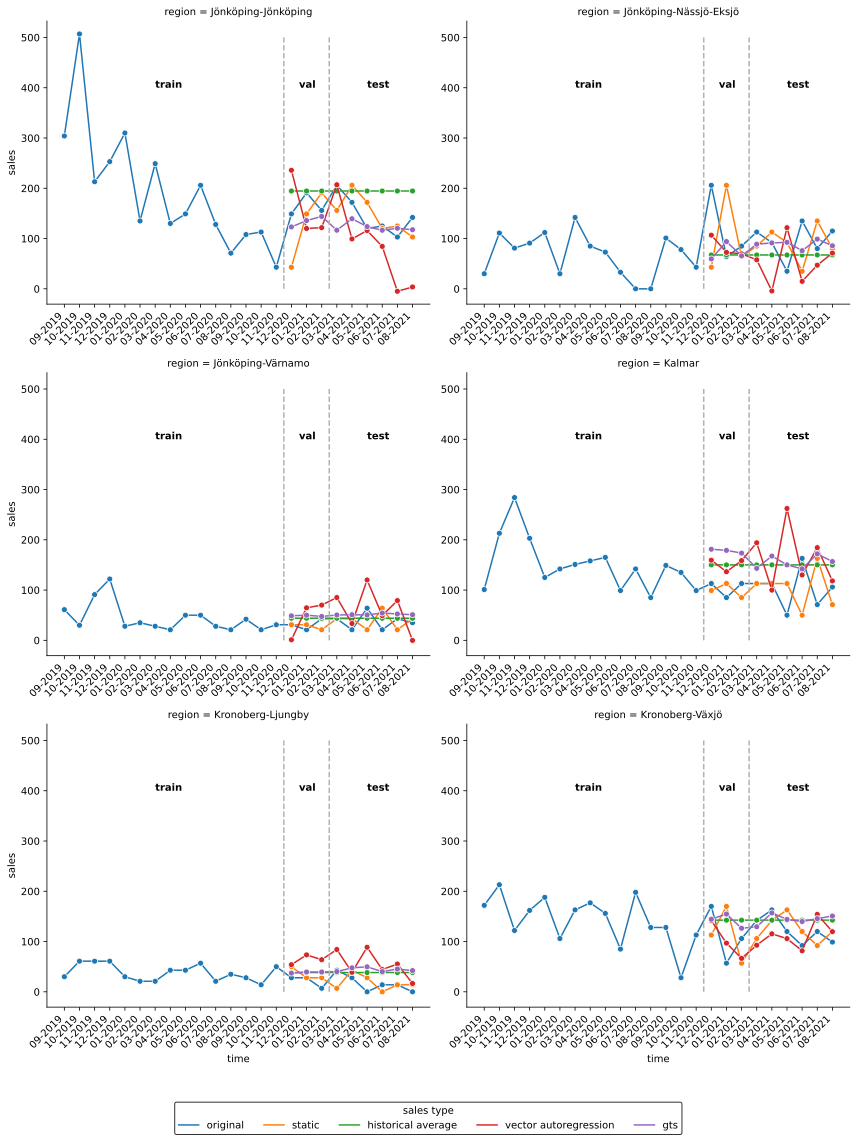

In [11]:
plot_sales(plot_data, regions_to_plot = bc_regions[6:12], y_height = 400, ymin = 0, ymax = 500, savefig = True, 
           filename = 'bc_sales_forecasts_7_12')

#### BC regions 13-18: Norrbotten-Sunderbyn, Skåne-Helsingborg-Landskrona, Skåne-Kristianstad, Skåne-Lund, Stockholm, Stockholm-Gotland

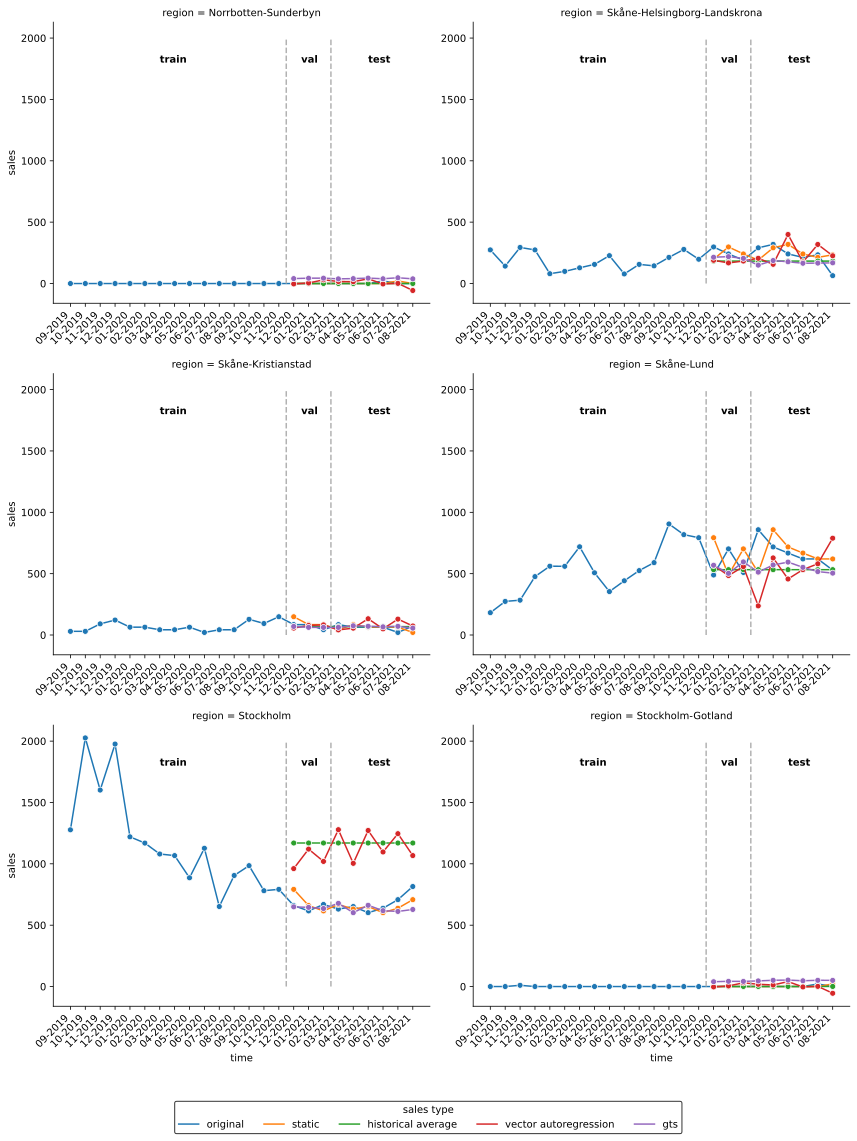

In [12]:
plot_sales(plot_data, regions_to_plot = bc_regions[12:18], y_height = 1800, ymin = 0, ymax = 2000, savefig = True, 
           filename = 'bc_sales_forecasts_13_18')

#### BC regions 19-24: Sörmland-Eskilstuna, Uppsala, Värmland-Karlstad, Västerbotten-Skellefteå, Västerbotten-Umeå, Västernorrland-Sundsvall

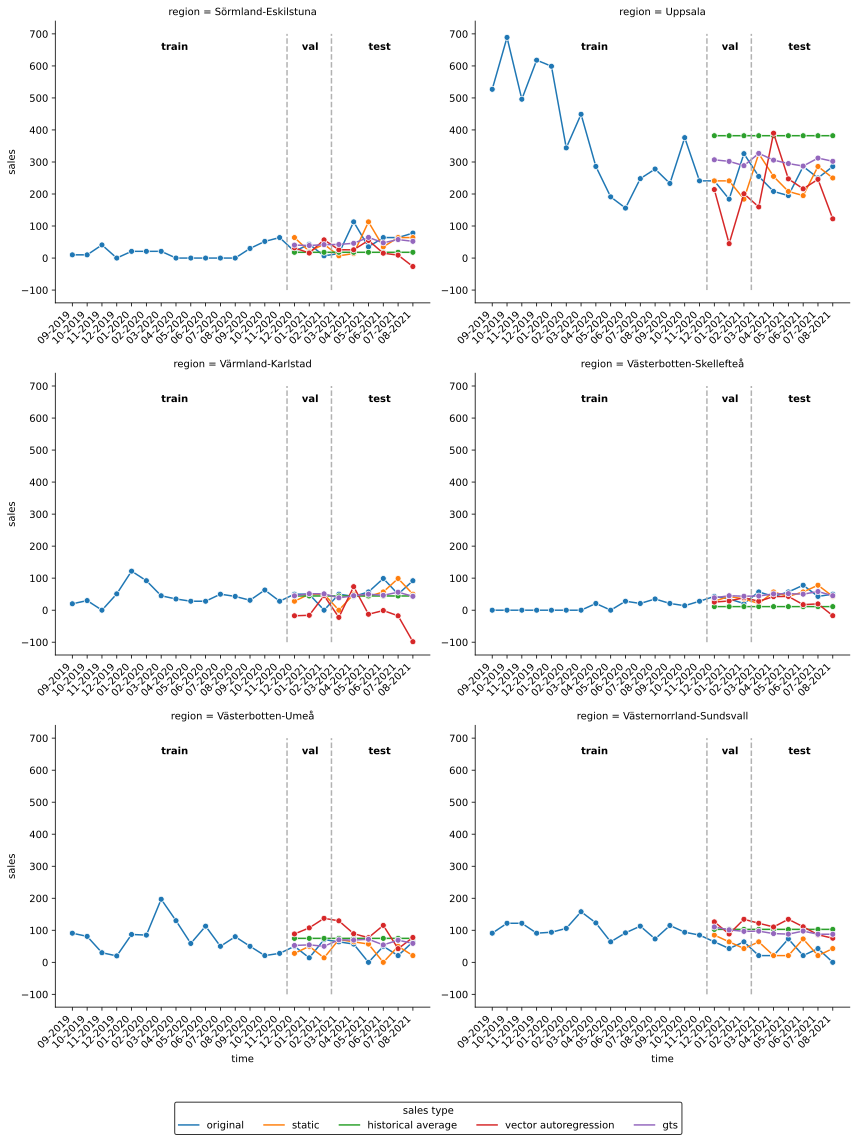

In [13]:
plot_sales(plot_data, regions_to_plot = bc_regions[18:24], y_height = 650, ymin = -100, ymax = 700, savefig = True, 
           filename = 'bc_sales_forecasts_19_24')

#### BC regions 25-30: Västernorrland-Örnsköldsvik, Västmanland-Västerås, Västra Götaland-Alingsås, Västra Götaland-Borås, Västra Götaland-Göteborg, Västra Götaland-Lidköping

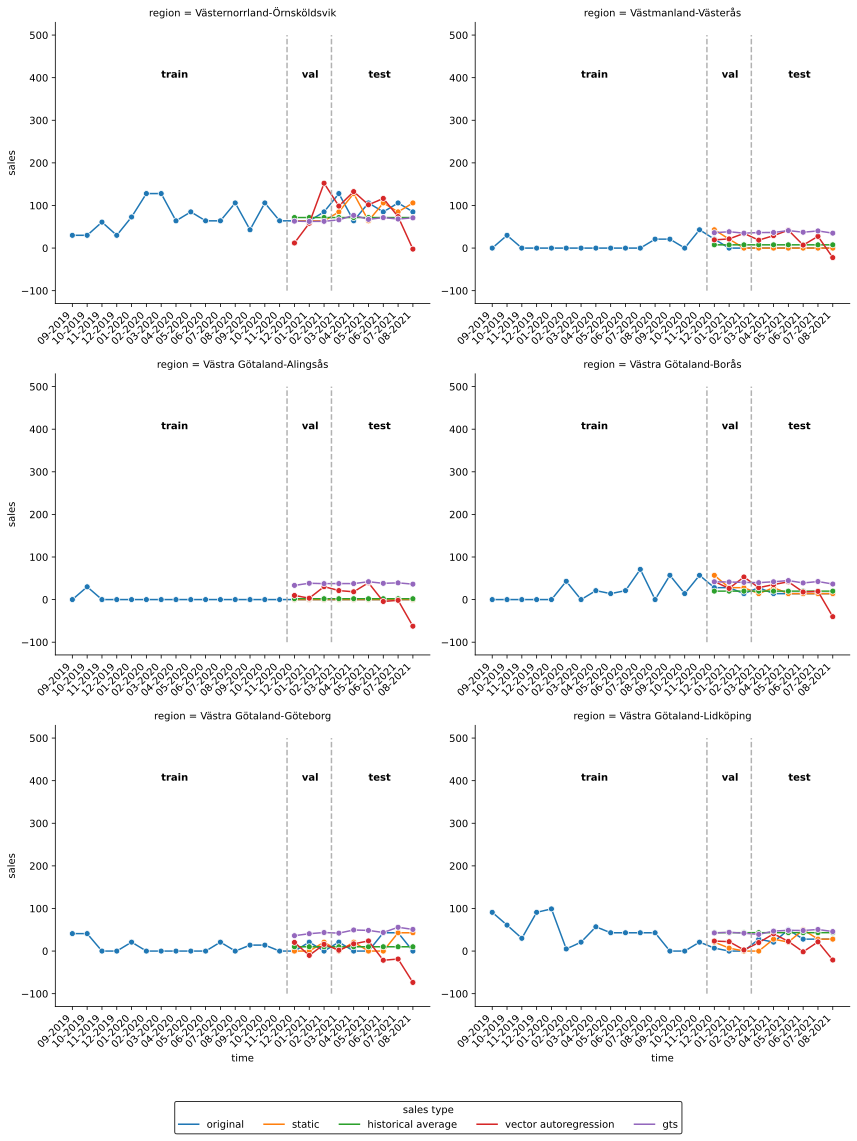

In [14]:
plot_sales(plot_data, regions_to_plot = bc_regions[24:30], y_height = 400, ymin = -100, ymax = 500, savefig = True, 
           filename = 'bc_sales_forecasts_25_30')

#### BC regions 31-35: Västra Götaland-Skövde, Västra Götaland-Uddevalla, Örebro-Örebro, Östergötland-Linköping, Östergötland-Nörrköping

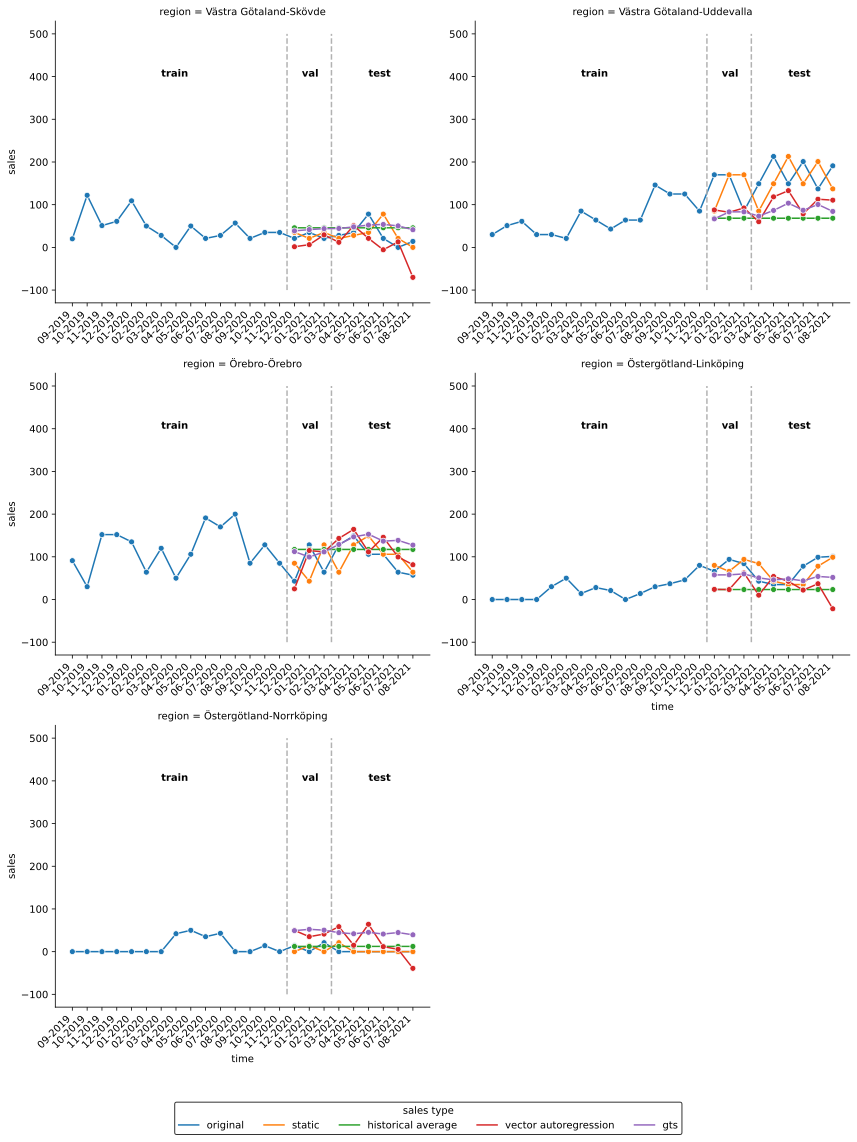

In [15]:
plot_sales(plot_data, regions_to_plot = bc_regions[30:35], y_height = 400, ymin = -100, ymax = 500, savefig = True, 
           filename = 'bc_sales_forecasts_31_35')

## Melanoma regions

Secondly, we create the plots for the melanoma regions.

#### Melanoma regions 1-6: Blekinge ONCO, Dalarna ONCO, Gävleborg-Gävle ONCO, Halland-Halmstad ONCO, Jämtland ONCO, Jönköping ONCO

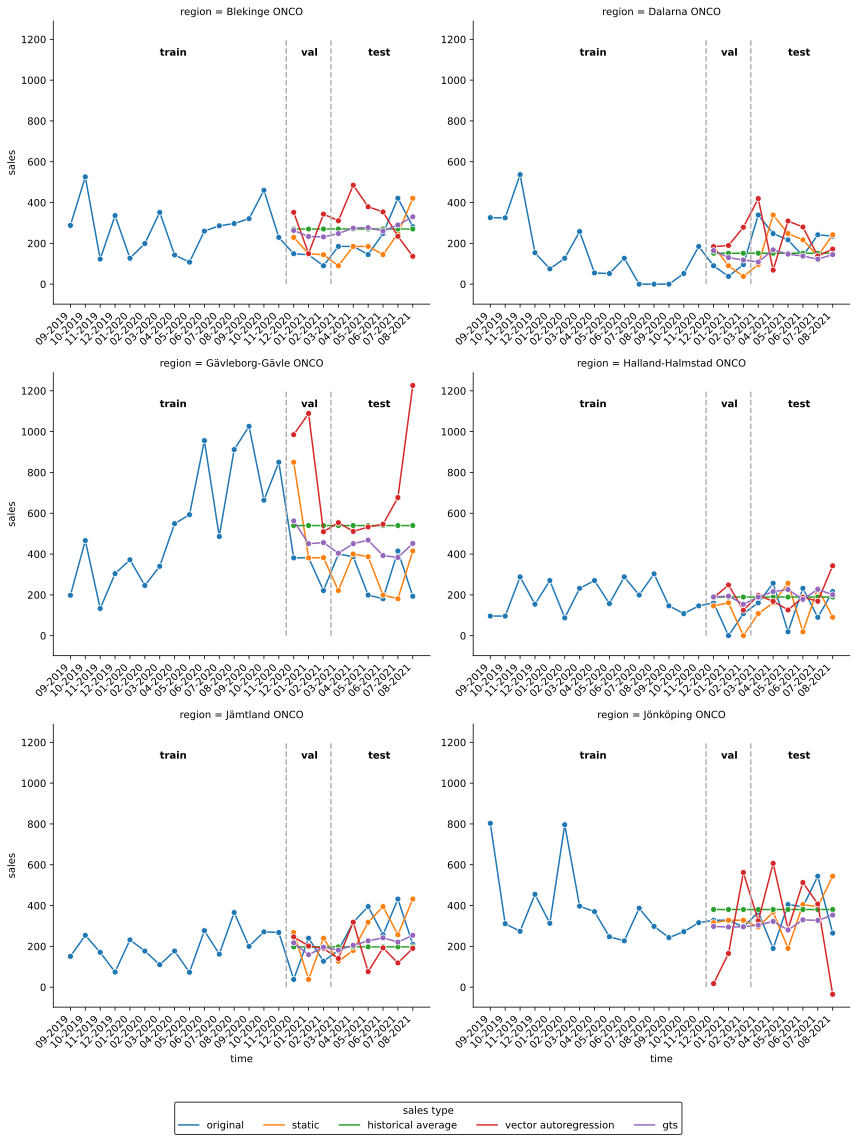

In [16]:
plot_sales(plot_data, regions_to_plot = melanoma_regions[0:6], y_height = 1120, ymin = 0, ymax = 1200, savefig = True, 
           filename = 'melanoma_sales_forecasts_1_6')

#### Melanoma regions 7-12: Kalmar ONCO, Kronoberg-Växjö ONCO, Norrbotten-Sunderbyn ONCO, Skåne ONCO, Stockholm ONCO, Stockholm-Gotland ONCO

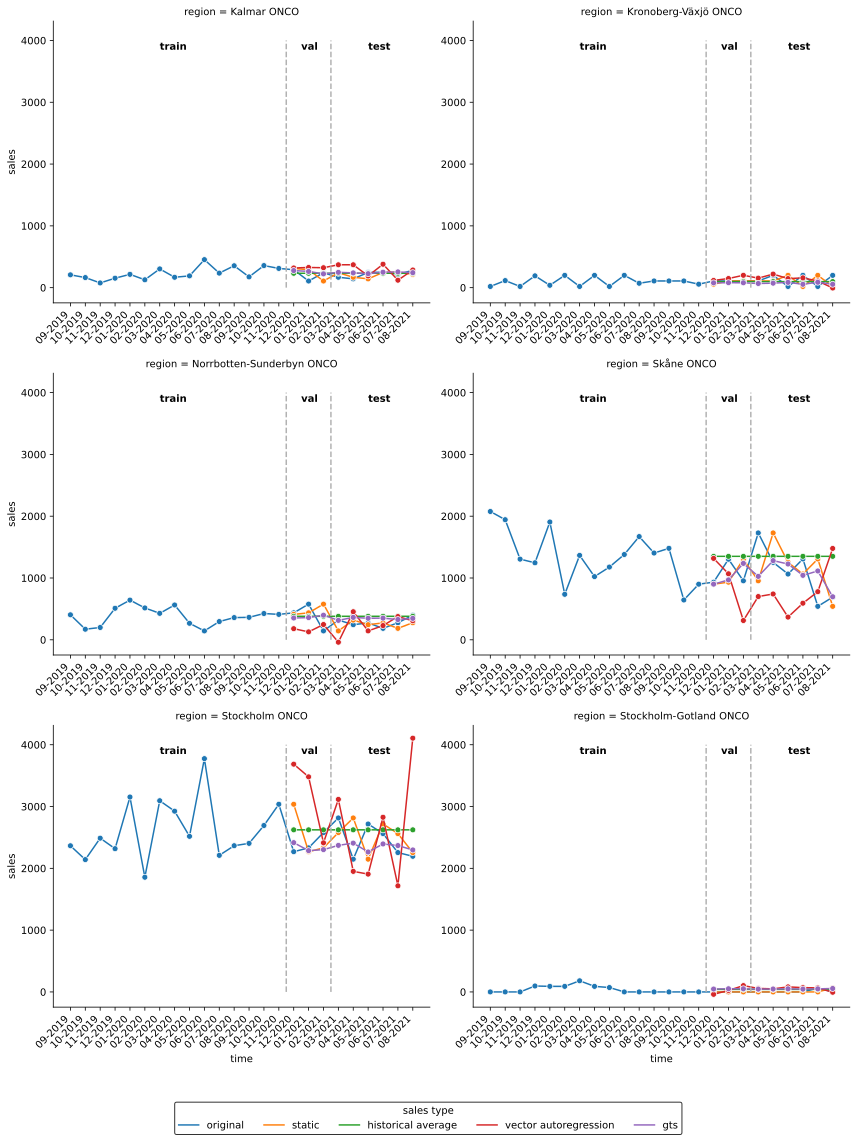

In [17]:
plot_sales(plot_data, regions_to_plot = melanoma_regions[6:12], y_height = 3850, ymin = 0, ymax = 4000, savefig = True, 
           filename = 'melanoma_sales_forecasts_7_12')

#### Melanoma regions 13-18: Sörmland-Eskilstuna ONCO, Uppsala ONCO, Värmland-Karlstad ONCO, Västerbotten-Umeå ONCO, Västernorrland-Sundsvall ONCO, Västmanland-Västerås ONCO

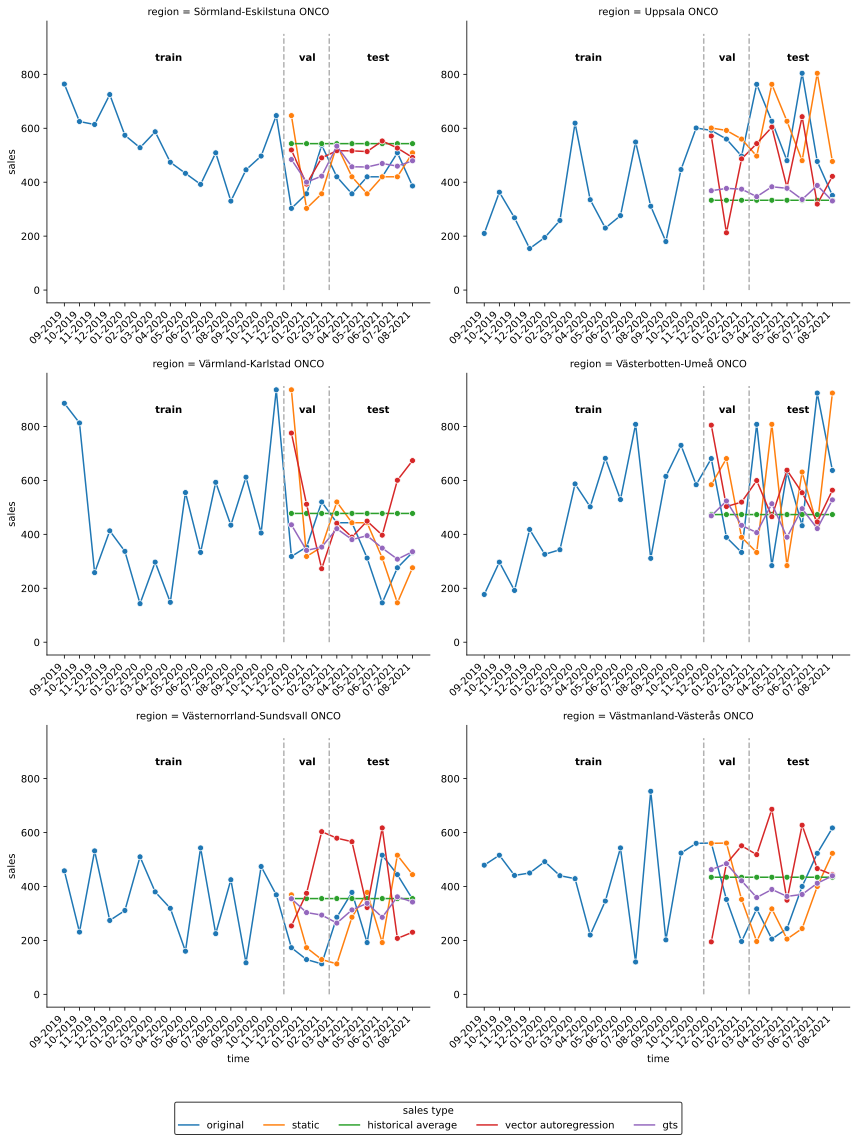

In [18]:
plot_sales(plot_data, regions_to_plot = melanoma_regions[12:18], y_height = 850, ymin = 0, ymax = 950, savefig = True, 
           filename = 'melanoma_sales_forecasts_13_18')

#### Melanoma regions 19-22: Västra Götaland-Göteborg ONCO, Västra Götaland-SÄS ONCO, Örebro-Örebro ONCO, Östergötland-Linköping ONCO

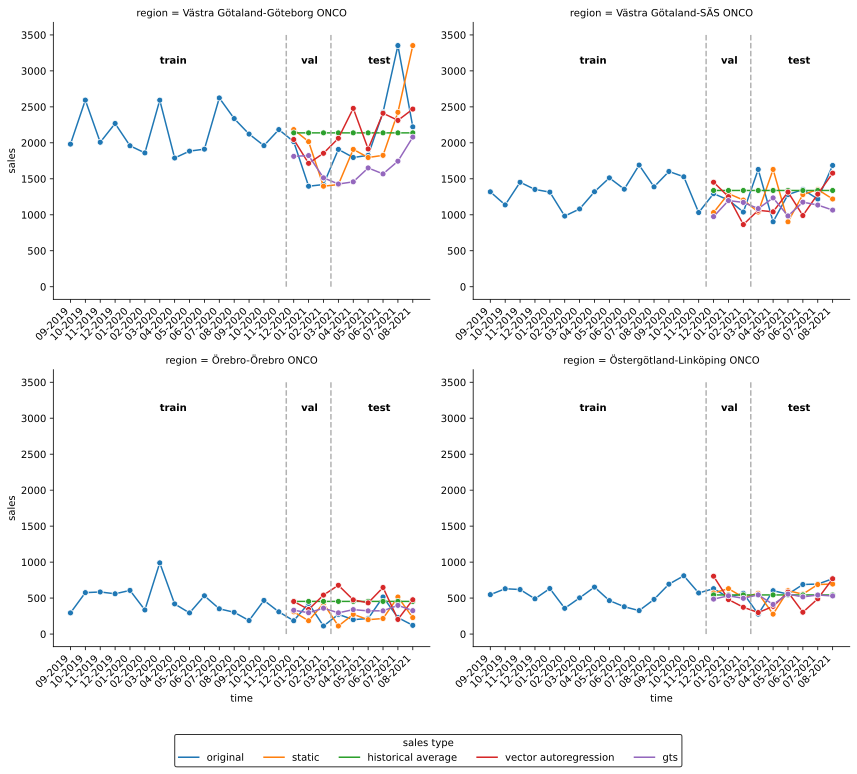

In [19]:
plot_sales(plot_data, regions_to_plot = melanoma_regions[18:22], y_height = 3100, ymin = 0, ymax = 3500, savefig = True, 
           filename = 'melanoma_sales_forecasts_19_22')